## Part 3: Discover Popular Dishes

The goal of this task is to mine the data set to discover the common/popular dishes of a particular cuisine. Typically when you go to try a new cuisine, you don’t know beforehand the types of dishes that are available for that cuisine. For this task, we would like to identify the dishes that are available for a cuisine by building a dish recognizer.

In this task, we used Gensim pharses and word2vec to mine popular dishes and used word cloud to visualize it.

In [1]:
from gensim.models import *
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim.utils import lemmatize, simple_preprocess
import re
import string
from collections import *
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from gensim.models.phrases import Phraser


In [2]:
reviews = pd.read_csv('../data/manualAnnotationTask/Indian.label', sep="\t", header= None).as_matrix().tolist()


/Users/vbhalala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [3]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'use', 'not', 'would', 'say', 'could', '_', 
                   'be', 'know', 'go', 'get', 'do', 'done', 'many', 'some', 
                    'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                   'want', 'seem', 'run', 'need', 'even', 'right', 'even', 'also', 
                   'may', 'take', 'come'])

sentences = []
for review in reviews:
    out = re.sub('[^a-z]+', ' ', review[0].lower())
    sentence = [i for i in simple_preprocess(str(out)) if i not in stop_words]
    sentences.append(sentence)


In [4]:
model = Phrases(sentences)
counter = Counter()
for key in model.vocab.keys():
    if len(key.decode().split('_'))>1:
        counter[key.decode().replace('_',' ')] += model.vocab[key]
for word,cnt in counter.most_common(10):
    print(word)

south indian
indian cuisine
chicken tikka
tikka masala
salad bar
main course
south asian
chick peas
deep fried
street food


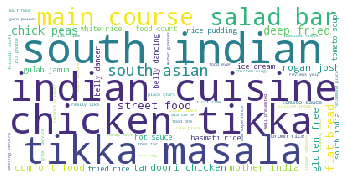

In [5]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(counter)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
bigram = []
for i in model.vocab.keys():
  bigram.append([i.decode("utf-8")])
  
w2v = Word2Vec(bigram, size=300, window=15, min_count=1, workers=4)
counter = Counter()
for key in w2v.wv.vocab.keys():
  if len(key.split('_'))>1:
      counter[key.replace('_',' ')] += w2v.wv.vocab[key].count
for word,cnt in counter.most_common(10):
    print(word)

salad bar
main course
south indian
indian cuisine
south asian
chick peas
chicken tikka
deep fried
street food
flat bread


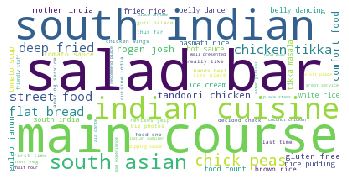

In [8]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(counter)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusion

Both of the experiments of using phrases and word2vec have produced decent results. We can see that most common 10 phrases are same in both sets. Also, both of methods have done great jobs in identifying dishes. We can see that almost all of these phrases refer to dishes except “Salad bar”, “main course”, and “Indian cuisine” which is very general and broad phrases. If we see the order of these frequent words and look at both of the experiments’ word cloud, we can see that we gave obtain very good and relevant results from our first experiments. This is better than word2vec is because it has given less weight to some the broad phrases that we have identified above. Overall, we think that results obtained from both of the experiments make sense, and we think that results obtained from phrases are more relevant.